# **Cat Breeds Analysis**

### Project includes:
- Extract, Transform, and Load (ETL) process:
    - Web Scraping with **Selenium** and **BeautifulSoup**
    - Data Wrangling and Cleaning with **Pandas** and **NumPy**
    - Saving data to CSV format
- Exploratory Data Analysis (EDA) with **Pandas**, **Seaborn**, and **Matplotlib**
- Simple program with **Python** and **Pandas**

### Project Outline
- [Install libraries](#Install-libraries)
- [Prepare target website for processing](#Prepare-target-website-for-processing)
- [Scrape the data and load into a DataFrame](#Scrape-the-data-and-load-into-a-DataFrame)
- [Data cleaning and flatening](#Data-cleaning-and-flatening)
    - [Trim white spaces](#Trim-white-spaces)
    - [Normilize category names, data formatting](#Normilize-category-names,-data-formatting)
    - [Sanitize unwanted trailing characters](#Sanitize-unwanted-trailing-characters)
    - [Deal with missing values](#Deal-with-missing-values)
    - [Flatten data](#Flatten-data)
    - [Assign data types](#Assign-data-types)
- [Save data to CSV format](#Save-data-to-CSV-format)
- [EDA (Exploratory Data Analysis)](#EDA-(Exploratory-Data-Analysis))
    - [Descriptive Statistics](#Descriptive-Statistics)
    - [Univariate Analysis](#Univariate-Analysis)
    - [Bivariate Analysis](#Bivariate-Analysis)
    - [Multivariate Analysis](#Multivariate-Analysis)
- PROGRAM: [Need help choosing a cat breed?](#Need-help-choosing-a-cat-breed?)

### Install libraries

In [1]:
# !pip install selenium
# !pip install webdriver_manager
# !pip install pandas

In [2]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import time
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Prepare target website for processing

In [3]:
# Create driver
driver = webdriver.Chrome()

# Open the link in the driver
url = "https://basepaws.com/cat-breeds"
driver.get(url)

# Close Pop Up
time.sleep(10)
driver.find_element(By.XPATH, '//button[@class="needsclick klaviyo-close-form kl-private-reset-css-Xuajs1"]').click()

# Scroll down
time.sleep(1)
driver.execute_script("window.scrollTo(0, 2500)")

# View all breeds
time.sleep(1)
driver.find_element(By.XPATH, '//button[text()="View More"]').click()

# Notify when the website is ready
print("Website is ready for scraping")

Website is ready for scraping


### Scrape the data and load into a DataFrame

In [4]:
# Create a DataFrame
df = pd.DataFrame(columns = ['Breed Image', 'Breed Name', 'Breed Group', 'Breed Description', 'Origin', 'Coat Pattern', 'Coat Length', 'Health Issues', 'Lifespan', 
                                      'Good With', 'Shedding Amount', 'Playfulness', 'Affection Level', 'Activity Level', 'Tendency to Vocalize', 'Exercise Needs'])

# Get all breeds links
breed_links = driver.find_elements(By.XPATH, "//a[@class='catalog__card media-card'][@href]")

# Loop through every breed link, scribe data, and load to the DataFrame
for link in breed_links:
    breed_url = link.get_attribute('href')
    response = requests.get(breed_url)
    soup = BeautifulSoup(response.content, 'html.parser')

    for i in soup.find_all("div", class_="wrapper__main"):
        find_image = i.find("img", class_="breed-detail__img")
        breed_image = ("https://basepaws.com/" + find_image.get('src'))
        breed_name = i.find("h1", class_="breed-detail__title").text
        breed_group = i.find("div", class_="breed-detail__subtitle").text
        breed_description = i.find("div", class_="breed-detail__description").find_next('p').text
        main_info = i.find("dl", class_="main-info__grid")
        origin = np.nan
        if main_info.find('dt', string='Origin'):
            origin = main_info.find_next('dd').text
        coat_pattern = main_info.find('dt', string='Coat Pattern').find_next('dd').text
        coat_length = main_info.find('dt', string='Coat Length').find_next('dd').text
        health_issues = i.find_all("span", class_="health-issues__text")
        # Another way to save as a list
        # all_health_issues = []
        all_health_issues = ''
        for issue in health_issues:
            # Another way to save as a list
            # all_health_issues.append(issue.text)
            all_health_issues = all_health_issues + issue.text + ', '
        breed_chars = i.find("dl", class_= None)
        if breed_chars:
            lifespan = breed_chars.find("dt", string='Lifespan').find_next('dt').text
            good_with = np.nan
            if breed_chars.find("dt", string=re.compile("ood with")):
                good_with = breed_chars.find("dt", string=re.compile("ood with")).find_next('dt').text
            shedding_amount = breed_chars.find("dt", string='Shedding amount').find_next('dt').text
            playfulness = breed_chars.find("dt", string='Playfulness').find_next('dt').text
            affection_level = breed_chars.find("dt", string='Affection level').find_next('dt').text
            activity_level = breed_chars.find("dt", string='Activity level').find_next('dt').text
            vocalization = breed_chars.find("dt", string='Tendency to vocalize').find_next('dt').text
            exercise_needs = breed_chars.find("dt", string='Exercise needs').find_next('dt').text  
            
            df = df.append({'Breed Image': breed_image, 'Breed Name': breed_name, 'Breed Group': breed_group, 'Breed Description': breed_description, 'Origin': origin, 
                                              'Coat Pattern': coat_pattern, 'Coat Length': coat_length, 'Health Issues': all_health_issues, 'Lifespan': lifespan, 'Good With': good_with, 
                                              'Shedding Amount': shedding_amount, 'Playfulness': playfulness, 'Affection Level': affection_level, 'Activity Level': activity_level, 
                                              'Tendency to Vocalize': vocalization, 'Exercise Needs': exercise_needs}, ignore_index = True)
        else:
            df = df.append({'Breed Image': breed_image, 'Breed Name': breed_name, 'Breed Group': breed_group, 'Breed Description': breed_description, 'Origin': origin, 
                                              'Coat Pattern': coat_pattern, 'Coat Length': coat_length, 'Health Issues': all_health_issues}, ignore_index = True)

# Close the driver
driver.close()

# Notify when scraping is complete
print("Web Scraping is complete")

Web Scraping is complete


### Data cleaning and flatening

#### Trim white spaces

In [5]:
# Check the database
df.head()

,Breed Image,Breed Name,Breed Group,Breed Description,Origin,Coat Pattern,Coat Length,Health Issues,Lifespan,Good With,Shedding Amount,Playfulness,Affection Level,Activity Level,Tendency to Vocalize,Exercise Needs
0,https://basepaws.com//_next/image?url=https%3A...,Maine Coon,Western Breeds,"Maine Coons are gentle giants with a loving, f...",USA,"Variety of patterns, but not colorpoint",Longhair,"Hypertrophic cardiomyopathy (HCM),",12-15 years,"Children, Dogs, Cats, Families",Medium,Medium,High,Medium,High,Medium
1,https://basepaws.com//_next/image?url=https%3A...,Bengal Cat,Exotic Breeds,"Often referred to as the ""Miniature Leopard"" o...",USA,"Spotted, rosetted, marbled",Shorthair and Longhair,"Erythrocyte pyruvate kinase deficiency, Progre...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://basepaws.com//_next/image?url=https%3A...,American Wirehair,Other Breeds,The American Wirehair is a highly affectionate...,USA,Variety of tabby patterns,Shorthair,"No strongly associated genetic conditions, Gen...",Up to 15+ years,"Families, children, some cats and dogs",Low,High,High,Medium,Low,Low
3,https://basepaws.com//_next/image?url=https%3A...,Persian Cat,Persian Breeds,Persians are one of the most popular breeds an...,Iran,"Variety of solid, colorpoint, tabby, tortoises...",Longhair,"Brachycephalic airway obstructive syndrome, Te...",15-20 years,"Children, Gentle Dogs, Cats, Families",Medium,Medium,High,Low,Low,Low to Medium
4,https://basepaws.com//_next/image?url=https%3A...,British Shorthair,Persian Breeds,British Shorthairs make great family pets due ...,Europe,Variety of patterns,Shorthair,"Polycystic kidney disease (PKD), Hypertrophic ...",12-16 years,"Children, Dogs, Cats, Families",Medium,Medium,High,Medium,Low,Medium


In [6]:
# Function that removes extra leading and tailing whitespace from the data
def whitespace_remover(df):
    # iterating over the columns
    for i in df.columns:
        # applying strip function on column
        df[i] = df[i].str.strip()

whitespace_remover(df)
print("White spaces removed")

White spaces removed


#### Normilize category names, data formatting

In [7]:
# Check unique values
print("Unique column values before normalizing:")
print(df['Exercise Needs'].unique())

# Replace values 
df['Exercise Needs'] = df['Exercise Needs'].replace('Low to Medium', 'Medium').replace('Medium to High', 'High')

# Check unique values
print("")
print("Unique column values after normalizing:")
print(df['Exercise Needs'].unique())

Unique column values before normalizing:
['Medium' nan 'Low' 'Low to Medium' 'High' 'Medium to High']

Unique column values after normalizing:
['Medium' nan 'Low' 'High']


In [8]:
# Check unique values
print("Unique column values before normalizing:")
print(df['Tendency to Vocalize'].unique())

# Replace values 
df['Tendency to Vocalize'] = df['Tendency to Vocalize'].replace('Low to Medium', 'Medium').replace('Medium to High', 'High')

# Check unique values
print("")
print("Unique column values after normalizing:")
print(df['Tendency to Vocalize'].unique())

Unique column values before normalizing:
['High' nan 'Low' 'Medium' 'Low to Medium' 'Medium to High']

Unique column values after normalizing:
['High' nan 'Low' 'Medium']


In [9]:
# Check unique values
print("Unique column values before normalizing:")
print(df['Activity Level'].unique())

# Replace values 
df['Activity Level'] = df['Activity Level'].replace('Medium to High', 'High')

# Check unique values
print("")
print("Unique column values after normalizing:")
print(df['Activity Level'].unique())

Unique column values before normalizing:
['Medium' nan 'Low' 'High' 'Medium to High']

Unique column values after normalizing:
['Medium' nan 'Low' 'High']


In [10]:
# Check unique values
print("Unique column values before normalizing:")
print(df['Affection Level'].unique())

# Replace values 
df['Affection Level'] = df['Affection Level'].replace('Medium to High', 'High')

# Check unique values
print("")
print("Unique column values after normalizing:")
print(df['Affection Level'].unique())

Unique column values before normalizing:
['High' nan 'Medium to High']

Unique column values after normalizing:
['High' nan]


In [11]:
# Check unique values
print("Unique column values before normalizing:")
print(df['Playfulness'].unique())

# Replace values 
df['Playfulness'] = df['Playfulness'].replace('Medium to High', 'High')
df['Playfulness'].replace('Normal', 'Medium', inplace=True)

# Check unique values
print("")
print("Unique column values after normalizing:")
print(df['Playfulness'].unique())

Unique column values before normalizing:
['Medium' nan 'High' 'Medium to High' 'Normal']

Unique column values after normalizing:
['Medium' nan 'High']


In [12]:
# Check unique values
print("Unique column values before normalizing:")
print(df['Shedding Amount'].unique())

# Replace values 
df['Shedding Amount'] = df['Shedding Amount'].replace('Low to Medium', 'Medium').replace('Medium to High', 'High')
df['Shedding Amount'].replace('Normal', 'Medium', inplace=True)

# Check unique values
print("")
print("Unique column values after normalizing:")
print(df['Shedding Amount'].unique())

Unique column values before normalizing:
['Medium' nan 'Low' 'Low to Medium' 'Normal' 'Medium to High' 'High']

Unique column values after normalizing:
['Medium' nan 'Low' 'High']


In [13]:
# Check unique values
print("Unique column values before normalizing:")
print(df['Coat Length'].unique())

# Replace values 
df['Coat Length'] = df['Coat Length'].replace('Shorthair (bald, flock or chamois, velour, brush, or straight)', 'Shorthair').replace(['Semi-longhaired','Semi-Longhaired', 'Semi-longhair'], 'Medium').replace('Shorthair and Longhair', 'Shorthair, Longhair').replace('Longhaired', 'Longhair')

# Check unique values
print("")
print("Unique column values after normalizing:")
print(df['Coat Length'].unique())

Unique column values before normalizing:
['Longhair' 'Shorthair and Longhair' 'Shorthair'
 'Shorthair (bald, flock or chamois, velour, brush, or straight)'
 'Semi-longhaired' 'Semi-longhair' 'Partially hairless'
 'Shorthair, Longhair' 'Hairless' 'Semi-Longhaired' 'Longhaired'
 'Variety of lengths']

Unique column values after normalizing:
['Longhair' 'Shorthair, Longhair' 'Shorthair' 'Medium'
 'Partially hairless' 'Hairless' 'Variety of lengths']


#### Sanitize unwanted trailing characters

In [14]:
# Remove ',' at the end of the last value in column
df['Health Issues'] = df['Health Issues'].str.replace('\,$','', regex=True)

# Check for ',' to be removed
df['Health Issues'].unique()

array(['Hypertrophic cardiomyopathy (HCM)',
       'Erythrocyte pyruvate kinase deficiency, Progressive retinal atrophy, Hypertrophic cardiomyopathy (HCM)',
       'No strongly associated genetic conditions, Generally healthy breed',
       'Brachycephalic airway obstructive syndrome, Tear duct drainage, Polycystic kidney disease (PKD), Hypertrophic cardiomyopathy (HCM), Feline lower urinary tract disease , Progressive retinal atrophy',
       'Polycystic kidney disease (PKD), Hypertrophic cardiomyopathy (HCM), Prone to obesity',
       'Feline OCD, Diabetes mellitus, Feline hyperesthesia syndrome, Crossed eyes, Lung infections, Vestibular disease, Neoplastic and gastrointestinal disorders',
       'No strongly associated genetic conditions',
       'Feline Infectious Peritonitis, Hypertrophic cardiomyopathy (HCM)',
       'Glycogen storage disease (Type IV), Hip dysplasia, Diabetes mellitus',
       'Polycystic kidney disease (PKD), Hypertrophic cardiomyopathy (HCM), Degenerative join

#### Deal with missing values

In [15]:
# Check missing values
df.isna().sum()

Breed Image             0
Breed Name              0
Breed Group             0
Breed Description       0
Origin                  1
Coat Pattern            0
Coat Length             0
Health Issues           0
Lifespan                5
Good With               5
Shedding Amount         5
Playfulness             5
Affection Level         5
Activity Level          5
Tendency to Vocalize    5
Exercise Needs          5
dtype: int64

In [16]:
# Calculate persentage of missing values
(df.isnull().sum()/(len(df)))*100

Breed Image              0.000000
Breed Name               0.000000
Breed Group              0.000000
Breed Description        0.000000
Origin                   2.083333
Coat Pattern             0.000000
Coat Length              0.000000
Health Issues            0.000000
Lifespan                10.416667
Good With               10.416667
Shedding Amount         10.416667
Playfulness             10.416667
Affection Level         10.416667
Activity Level          10.416667
Tendency to Vocalize    10.416667
Exercise Needs          10.416667
dtype: float64

In [17]:
# Check where the data is missing
# missing_data = df.isnull()

# for column in missing_data.columns.values.tolist():
#     print(column)
#     print (missing_data[column].value_counts())
#     print("")  

# Check if there any more data is missing
# df.info()
# df.isna().value_counts().to_frame()

In [18]:
# Check how many NaN values
print("Missing values before replacing:")
# print(df["Origin"].isna().value_counts())
print(df["Origin"].isna().sum())

# Locate NaN
print("")
print("Missing value index:")
print(df[df['Origin'].isna()].index.tolist())
print("")
print("Missing value information:")
print(df.loc[26, ['Breed Name', 'Origin']].to_frame())

# Search for the correct origin name and replace the value
df['Origin'].replace(np.nan, "Myanmar, Thailand", inplace=True)

# Check if any NaN values left
print("")
print("Missing values after replacing:")
# print(df["Origin"].isna().value_counts())
print(df["Origin"].isna().sum())

# Check count of each value in the column
print("")
print("Unique column values count:")
print(df["Origin"].value_counts())

Missing values before replacing:
1

Missing value index:
[26]

Missing value information:
                 26
Breed Name  Burmese
Origin          NaN

Missing values after replacing:
0

Unique column values count:
USA                             19
UK                               4
Russia                           3
Asia                             3
Unknown                          2
Thailand                         2
Turkey                           2
Isle of Man                      1
UK, USA                          1
France                           1
Canada                           1
Myanmar, Thailand                1
Europe, North America, Egypt     1
Africa, Asia                     1
Myanmar                          1
Iran                             1
Scotland                         1
Norway                           1
Europe                           1
Sweden                           1
Name: Origin, dtype: int64


In [19]:
# Check how many NaN values
print("Missing values before replacing:")
print(df["Lifespan"].isna().sum())

# Replace with the most frequent value
common_lifespan = df['Lifespan'].value_counts().idxmax()
df['Lifespan'].replace(np.nan, common_lifespan, inplace=True)

# Check if any NaN values left
print("")
print("Missing values after replacing:")
print(df["Lifespan"].isna().sum())

# Check count of each value in the column
print("")
print("Unique column values count:")
print(df["Lifespan"].value_counts())

Missing values before replacing:
5

Missing values after replacing:
0

Unique column values count:
10-15 years        11
12-15 years         4
8-13+ years         2
12-17 years         2
13-20 years         2
12-18 years         2
15-20 years         2
15+ years           1
16+ years           1
14+ years           1
Up to 15 years      1
13+ years           1
10-20 years         1
10-15+ years        1
12-17+ years        1
11-15+ years        1
10-19 years         1
12-20 years         1
12+ years           1
9-15+ years         1
10-13 years         1
10-16 years         1
15-18 years         1
8-11 years          1
11-14+ years        1
18-20 years         1
10-12 years         1
12-16 years         1
Up to 15+ years     1
12-20+ years        1
Name: Lifespan, dtype: int64


In [20]:
# Check how many NaN values
print("Missing values before replacing:")
print(df["Good With"].isna().sum())

# Replace with the most frequent value
common_good_with = df['Good With'].value_counts().idxmax()
df['Good With'].replace(np.nan, common_good_with, inplace=True)

# Check if any NaN values left
print("")
print("Missing values after replacing:")
print(df["Good With"].isna().sum())

# Check count of each value in the column
print("")
print("Unique column values count:")
print(df["Good With"].value_counts())

Missing values before replacing:
5

Missing values after replacing:
0

Unique column values count:
Children, Dogs, Cats, Families                                28
Families, children, cats, cat-friendly dogs                    6
Children, Gentle Dogs, Cats, Families                          2
Children (older), Dogs, Cats, Families                         2
Children, Cats, Families                                       2
Families, children, some cats and dogs                         1
Cats, dogs, families (can be territorial)                      1
Other cats, not for families with children or smaller pets     1
Families, Dogs and Cats (with proper socialization)            1
Familes, some pets (depends)                                   1
Children, Dogs, Families, Some Cats                            1
Families, children, some dogs and cats                         1
Families, children, dogs, cats                                 1
Name: Good With, dtype: int64


In [21]:
# Check how many NaN values
print("Missing values before replacing:")
print(df["Shedding Amount"].isna().sum())

# Replace with the most frequent value
common_shedding_amount = df['Shedding Amount'].value_counts().idxmax()
df['Shedding Amount'].replace(np.nan, common_shedding_amount, inplace=True)

# Check if any NaN values left
print("")
print("Missing values after replacing:")
print(df["Shedding Amount"].isna().sum())

# Check count of each value in the column
print("")
print("Unique column values count:")
print(df["Shedding Amount"].value_counts())

Missing values before replacing:
5

Missing values after replacing:
0

Unique column values count:
Medium    28
Low       15
High       5
Name: Shedding Amount, dtype: int64


In [22]:
# Check how many NaN values
print("Missing values before replacing:")
print(df["Playfulness"].isna().sum())

# Replace with the most frequent value
common_playfulness = df['Playfulness'].value_counts().idxmax()
df['Playfulness'].replace(np.nan, common_playfulness, inplace=True)

# Check if any NaN values left
print("")
print("Missing values after replacing:")
print(df["Playfulness"].isna().sum())

# Check count of each value in the column
print("")
print("Unique column values count:")
print(df["Playfulness"].value_counts())

Missing values before replacing:
5

Missing values after replacing:
0

Unique column values count:
High      38
Medium    10
Name: Playfulness, dtype: int64


In [23]:
# Check how many NaN values
print("Missing values before replacing:")
print(df["Affection Level"].isna().sum())

# Replace with the most frequent value
common_affection_level = df['Affection Level'].value_counts().idxmax()
df['Affection Level'].replace(np.nan, common_affection_level, inplace=True)

# Check if any NaN values left
print("")
print("Missing values after replacing:")
print(df["Affection Level"].isna().sum())

# Check count of each value in the column
print("")
print("Unique column values count:")
print(df["Affection Level"].value_counts())

Missing values before replacing:
5

Missing values after replacing:
0

Unique column values count:
High    48
Name: Affection Level, dtype: int64


In [24]:
# Check how many NaN values
print("Missing values before replacing:")
print(df["Activity Level"].isna().sum())

# Replace with the most frequent value
common_activity_level = df['Activity Level'].value_counts().idxmax()
df['Activity Level'].replace(np.nan, common_activity_level, inplace=True)

# Check if any NaN values left
print("")
print("Missing values after replacing:")
print(df["Activity Level"].isna().sum())

# Check count of each value in the column
print("")
print("Unique column values count:")
print(df["Activity Level"].value_counts())

Missing values before replacing:
5

Missing values after replacing:
0

Unique column values count:
High      30
Medium    17
Low        1
Name: Activity Level, dtype: int64


In [25]:
# Check how many NaN values
print("Missing values before replacing:")
print(df["Tendency to Vocalize"].isna().sum())

# Replace with the most frequent value
common_tendency_to_vocalize = df['Tendency to Vocalize'].value_counts().idxmax()
df['Tendency to Vocalize'].replace(np.nan, common_tendency_to_vocalize, inplace=True)

# Check if any NaN values left
print("")
print("Missing values after replacing:")
print(df["Tendency to Vocalize"].isna().sum())

# Check count of each value in the column
print("")
print("Unique column values count:")
print(df["Tendency to Vocalize"].value_counts())

Missing values before replacing:
5

Missing values after replacing:
0

Unique column values count:
Medium    23
Low       13
High      12
Name: Tendency to Vocalize, dtype: int64


In [26]:
# Check how many NaN values
print("Missing values before replacing:")
print(df["Exercise Needs"].isna().sum())

# Replace with the most frequent value
common_exercise_needs = df['Exercise Needs'].value_counts().idxmax()
df['Exercise Needs'].replace(np.nan, common_exercise_needs, inplace=True)

# Check if any NaN values left
print("")
print("Missing values after replacing:")
print(df["Exercise Needs"].isna().sum())

# Check count of each value in the column
print("")
print("Unique column values count:")
print(df["Exercise Needs"].value_counts())

Missing values before replacing:
5

Missing values after replacing:
0

Unique column values count:
High      28
Medium    19
Low        1
Name: Exercise Needs, dtype: int64


In [27]:
# Check if there is any missing data left
df.info()
df.isna().value_counts().to_frame()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Breed Image           48 non-null     object
 1   Breed Name            48 non-null     object
 2   Breed Group           48 non-null     object
 3   Breed Description     48 non-null     object
 4   Origin                48 non-null     object
 5   Coat Pattern          48 non-null     object
 6   Coat Length           48 non-null     object
 7   Health Issues         48 non-null     object
 8   Lifespan              48 non-null     object
 9   Good With             48 non-null     object
 10  Shedding Amount       48 non-null     object
 11  Playfulness           48 non-null     object
 12  Affection Level       48 non-null     object
 13  Activity Level        48 non-null     object
 14  Tendency to Vocalize  48 non-null     object
 15  Exercise Needs        48 non-null     obje

,,,,,,,,,,,,,,,,0
Breed Image,Breed Name,Breed Group,Breed Description,Origin,Coat Pattern,Coat Length,Health Issues,Lifespan,Good With,Shedding Amount,Playfulness,Affection Level,Activity Level,Tendency to Vocalize,Exercise Needs,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,48


#### Flatten data

In [28]:
df.head()

,Breed Image,Breed Name,Breed Group,Breed Description,Origin,Coat Pattern,Coat Length,Health Issues,Lifespan,Good With,Shedding Amount,Playfulness,Affection Level,Activity Level,Tendency to Vocalize,Exercise Needs
0,https://basepaws.com//_next/image?url=https%3A...,Maine Coon,Western Breeds,"Maine Coons are gentle giants with a loving, f...",USA,"Variety of patterns, but not colorpoint",Longhair,Hypertrophic cardiomyopathy (HCM),12-15 years,"Children, Dogs, Cats, Families",Medium,Medium,High,Medium,High,Medium
1,https://basepaws.com//_next/image?url=https%3A...,Bengal Cat,Exotic Breeds,"Often referred to as the ""Miniature Leopard"" o...",USA,"Spotted, rosetted, marbled","Shorthair, Longhair","Erythrocyte pyruvate kinase deficiency, Progre...",10-15 years,"Children, Dogs, Cats, Families",Medium,High,High,High,Medium,High
2,https://basepaws.com//_next/image?url=https%3A...,American Wirehair,Other Breeds,The American Wirehair is a highly affectionate...,USA,Variety of tabby patterns,Shorthair,"No strongly associated genetic conditions, Gen...",Up to 15+ years,"Families, children, some cats and dogs",Low,High,High,Medium,Low,Low
3,https://basepaws.com//_next/image?url=https%3A...,Persian Cat,Persian Breeds,Persians are one of the most popular breeds an...,Iran,"Variety of solid, colorpoint, tabby, tortoises...",Longhair,"Brachycephalic airway obstructive syndrome, Te...",15-20 years,"Children, Gentle Dogs, Cats, Families",Medium,Medium,High,Low,Low,Medium
4,https://basepaws.com//_next/image?url=https%3A...,British Shorthair,Persian Breeds,British Shorthairs make great family pets due ...,Europe,Variety of patterns,Shorthair,"Polycystic kidney disease (PKD), Hypertrophic ...",12-16 years,"Children, Dogs, Cats, Families",Medium,Medium,High,Medium,Low,Medium


In [29]:
# Create additional columns and find if specific value exists
df['Good with Cats'] = df["Good With"].str.contains('ats')
df['Good with Dogs'] = df["Good With"].str.contains('ogs')
df['Good with Children'] = df["Good With"].str.contains('hildren')
df['Good with Families'] = df["Good With"].str.contains('amilies')

In [30]:
# Change to True due to a value typo 'Familes, some pets (depends)'
df.loc[33, 'Good with Families'] = True

# Change to False due to a specific value name 'Other cats, not for families with children or smaller pets'
df.loc[23, 'Good with Children'] = False

In [31]:
# Check if new columns were created
df.head()

,Breed Image,Breed Name,Breed Group,Breed Description,Origin,Coat Pattern,Coat Length,Health Issues,Lifespan,Good With,Shedding Amount,Playfulness,Affection Level,Activity Level,Tendency to Vocalize,Exercise Needs,Good with Cats,Good with Dogs,Good with Children,Good with Families
0,https://basepaws.com//_next/image?url=https%3A...,Maine Coon,Western Breeds,"Maine Coons are gentle giants with a loving, f...",USA,"Variety of patterns, but not colorpoint",Longhair,Hypertrophic cardiomyopathy (HCM),12-15 years,"Children, Dogs, Cats, Families",Medium,Medium,High,Medium,High,Medium,True,True,True,True
1,https://basepaws.com//_next/image?url=https%3A...,Bengal Cat,Exotic Breeds,"Often referred to as the ""Miniature Leopard"" o...",USA,"Spotted, rosetted, marbled","Shorthair, Longhair","Erythrocyte pyruvate kinase deficiency, Progre...",10-15 years,"Children, Dogs, Cats, Families",Medium,High,High,High,Medium,High,True,True,True,True
2,https://basepaws.com//_next/image?url=https%3A...,American Wirehair,Other Breeds,The American Wirehair is a highly affectionate...,USA,Variety of tabby patterns,Shorthair,"No strongly associated genetic conditions, Gen...",Up to 15+ years,"Families, children, some cats and dogs",Low,High,High,Medium,Low,Low,True,True,True,True
3,https://basepaws.com//_next/image?url=https%3A...,Persian Cat,Persian Breeds,Persians are one of the most popular breeds an...,Iran,"Variety of solid, colorpoint, tabby, tortoises...",Longhair,"Brachycephalic airway obstructive syndrome, Te...",15-20 years,"Children, Gentle Dogs, Cats, Families",Medium,Medium,High,Low,Low,Medium,True,True,True,True
4,https://basepaws.com//_next/image?url=https%3A...,British Shorthair,Persian Breeds,British Shorthairs make great family pets due ...,Europe,Variety of patterns,Shorthair,"Polycystic kidney disease (PKD), Hypertrophic ...",12-16 years,"Children, Dogs, Cats, Families",Medium,Medium,High,Medium,Low,Medium,True,True,True,True


In [32]:
# Check unique values
print("Uniques values before splitting:")
print(df['Origin'].unique())

# Split values at ','
df['Origin'] = df['Origin'].str.split(',')

# Transform splitted elements from list into rows and reset the index
df = df.explode('Origin').reset_index(drop=True)

# Remove white spaces
df['Origin'] = df['Origin'].str.strip()

# Check the result
print("")
print("Uniques values after splitting:")
print(df['Origin'].unique())
df.loc[:, ['Breed Name', 'Origin']]

Uniques values before splitting:
['USA' 'Iran' 'Europe' 'Thailand' 'Russia' 'Norway' 'Scotland' 'Turkey'
 'Asia' 'UK' 'Europe, North America, Egypt' 'Myanmar' 'Africa, Asia'
 'Unknown' 'Myanmar, Thailand' 'Canada' 'France' 'UK, USA' 'Isle of Man'
 'Sweden']

Uniques values after splitting:
['USA' 'Iran' 'Europe' 'Thailand' 'Russia' 'Norway' 'Scotland' 'Turkey'
 'Asia' 'UK' 'North America' 'Egypt' 'Myanmar' 'Africa' 'Unknown' 'Canada'
 'France' 'Isle of Man' 'Sweden']


,Breed Name,Origin
0,Maine Coon,USA
1,Bengal Cat,USA
2,American Wirehair,USA
3,Persian Cat,Iran
4,British Shorthair,Europe
5,Thai Siamese,Thailand
6,Peterbald,Russia
7,Ragdoll,USA
8,Munchkin Cat,USA
9,Norwegian Forest Cat,Norway


In [33]:
# Check unique values
print("Uniques values before splitting:")
print(df['Coat Length'].unique())

# Split values at ','
df['Coat Length'] = df['Coat Length'].map(lambda x: x.split(','))

# Transform splitted elements from list into rows and reset the index
df = df.explode('Coat Length').reset_index(drop=True)

# Remove white spaces
df['Coat Length'] = df['Coat Length'].str.strip()

# Check the result
print("")
print("Uniques values after splitting:")
print(df['Coat Length'].unique())
df.loc[:, ['Breed Name', 'Coat Length']]

Uniques values before splitting:
['Longhair' 'Shorthair, Longhair' 'Shorthair' 'Medium'
 'Partially hairless' 'Hairless' 'Variety of lengths']

Uniques values after splitting:
['Longhair' 'Shorthair' 'Medium' 'Partially hairless' 'Hairless'
 'Variety of lengths']


,Breed Name,Coat Length
0,Maine Coon,Longhair
1,Bengal Cat,Shorthair
2,Bengal Cat,Longhair
3,American Wirehair,Shorthair
4,Persian Cat,Longhair
...,...,...
58,American Bobtail,Shorthair
59,American Bobtail,Longhair
60,Ragamuffin,Longhair
61,Balinese,Longhair


In [34]:
# Check unique values
print("Uniques values before splitting:")
print(df['Health Issues'].unique())

# Split values at ','
df['Health Issues'] = df['Health Issues'].map(lambda x: x.split(','))

# Transform splitted elements from list into rows and reset the index
df = df.explode('Health Issues').reset_index(drop=True)

# Remove white spaces
df['Health Issues'] = df['Health Issues'].str.strip()

# Drop duplicates again after white spaces were removed
# df = df.drop_duplicates(subset = ['Breed Name', 'Health Issues'], keep = 'last').reset_index(drop = True) 

# Check the result
print("")
print("Uniques values after splitting:")
print(df['Health Issues'].unique())
df.loc[:, ['Breed Name', 'Health Issues']]

Uniques values before splitting:
['Hypertrophic cardiomyopathy (HCM)'
 'Erythrocyte pyruvate kinase deficiency, Progressive retinal atrophy, Hypertrophic cardiomyopathy (HCM)'
 'No strongly associated genetic conditions, Generally healthy breed'
 'Brachycephalic airway obstructive syndrome, Tear duct drainage, Polycystic kidney disease (PKD), Hypertrophic cardiomyopathy (HCM), Feline lower urinary tract disease , Progressive retinal atrophy'
 'Polycystic kidney disease (PKD), Hypertrophic cardiomyopathy (HCM), Prone to obesity'
 'Feline OCD, Diabetes mellitus, Feline hyperesthesia syndrome, Crossed eyes, Lung infections, Vestibular disease, Neoplastic and gastrointestinal disorders'
 'No strongly associated genetic conditions'
 'Feline Infectious Peritonitis, Hypertrophic cardiomyopathy (HCM)'
 'Glycogen storage disease (Type IV), Hip dysplasia, Diabetes mellitus'
 'Polycystic kidney disease (PKD), Hypertrophic cardiomyopathy (HCM), Degenerative joint disease'
 'Polycystic kidney disea

,Breed Name,Health Issues
0,Maine Coon,Hypertrophic cardiomyopathy (HCM)
1,Bengal Cat,Erythrocyte pyruvate kinase deficiency
2,Bengal Cat,Progressive retinal atrophy
3,Bengal Cat,Hypertrophic cardiomyopathy (HCM)
4,Bengal Cat,Erythrocyte pyruvate kinase deficiency
...,...,...
180,Balinese,Systemic amyloidosis
181,Bombay,Hypertrophic cardiomyopathy (HCM)
182,Bombay,Prone to obesity
183,Bombay,Breathing problems


In [35]:
# Split 'Lifespan' column to the left of the value to a new column
df['Lifespan Min Years'] = np.where((df['Lifespan'].str.contains('-')), df['Lifespan'].str.split('-').str[0], np.nan)

# Split 'Lifespan' column to the right of the value to a new column
df['Lifespan Up to + Years'] = np.where((df['Lifespan'].str.contains('-')), df['Lifespan'].str.split('-').str[1], df['Lifespan'])

# Extract digits
df['Lifespan Up to + Years'] = df['Lifespan Up to + Years'].str.extract('(\d+)')

# Check the result
df.loc[:, ['Breed Name', 'Lifespan', 'Lifespan Min Years', 'Lifespan Up to + Years']]

,Breed Name,Lifespan,Lifespan Min Years,Lifespan Up to + Years
0,Maine Coon,12-15 years,12,15
1,Bengal Cat,10-15 years,10,15
2,Bengal Cat,10-15 years,10,15
3,Bengal Cat,10-15 years,10,15
4,Bengal Cat,10-15 years,10,15
...,...,...,...,...
180,Balinese,12-20+ years,12,20
181,Bombay,12-17 years,12,17
182,Bombay,12-17 years,12,17
183,Bombay,12-17 years,12,17


In [36]:
# Check how many NaN values
print("Missing values before replacing:")
print("Lifespan Min Years:")
print(df["Lifespan Min Years"].isna().sum())
print("Lifespan Up to + Years:")
print(df["Lifespan Up to + Years"].isna().sum())

# Replace NaNs with the most frequent value
common_lifespan_min = df['Lifespan Min Years'].value_counts().idxmax()
df['Lifespan Min Years'].replace(np.nan, common_lifespan_min, inplace=True)

# Check if any NaN values left
print("")
print("Missing values after replacing:")
print("Lifespan Min Years:")
print(df["Lifespan Min Years"].isna().sum())
print("Lifespan Up to + Years:")
print(df["Lifespan Up to + Years"].isna().sum())

# Check unique values in the column
print("")
print("Unique column values:")
print("Lifespan Min Years:")
print(df["Lifespan Min Years"].unique())
print("Lifespan Up to + Years:")
print(df["Lifespan Up to + Years"].unique())

# Check the result
df.loc[:, ['Breed Name', 'Lifespan', 'Lifespan Min Years', 'Lifespan Up to + Years']]

Missing values before replacing:
Lifespan Min Years:
33
Lifespan Up to + Years:
0

Missing values after replacing:
Lifespan Min Years:
0
Lifespan Up to + Years:
0

Unique column values:
Lifespan Min Years:
['12' '10' '15' '18' '11' '8' '13' '9']
Lifespan Up to + Years:
['15' '20' '16' '12' '14' '11' '18' '13' '17' '19']


,Breed Name,Lifespan,Lifespan Min Years,Lifespan Up to + Years
0,Maine Coon,12-15 years,12,15
1,Bengal Cat,10-15 years,10,15
2,Bengal Cat,10-15 years,10,15
3,Bengal Cat,10-15 years,10,15
4,Bengal Cat,10-15 years,10,15
...,...,...,...,...
180,Balinese,12-20+ years,12,20
181,Bombay,12-17 years,12,17
182,Bombay,12-17 years,12,17
183,Bombay,12-17 years,12,17


#### Assign data types

In [37]:
# Print data types
print('Data types before change:')
print(df.dtypes)

# Change data types from 'object' to 'int'
df[['Lifespan Min Years', 'Lifespan Up to + Years', 'Good with Cats', 'Good with Dogs', 'Good with Children', 'Good with Families']] = df[['Lifespan Min Years', 'Lifespan Up to + Years', 'Good with Cats', 'Good with Dogs', 'Good with Children', 'Good with Families']].astype("int")

# Check new data types
print("")
print('Data types after change:')
print(df.dtypes)

Data types before change:
Breed Image               object
Breed Name                object
Breed Group               object
Breed Description         object
Origin                    object
Coat Pattern              object
Coat Length               object
Health Issues             object
Lifespan                  object
Good With                 object
Shedding Amount           object
Playfulness               object
Affection Level           object
Activity Level            object
Tendency to Vocalize      object
Exercise Needs            object
Good with Cats              bool
Good with Dogs              bool
Good with Children          bool
Good with Families          bool
Lifespan Min Years        object
Lifespan Up to + Years    object
dtype: object

Data types after change:
Breed Image               object
Breed Name                object
Breed Group               object
Breed Description         object
Origin                    object
Coat Pattern              object
Coat Lengt

In [38]:
# Check new DataFrame
df.head()

,Breed Image,Breed Name,Breed Group,Breed Description,Origin,Coat Pattern,Coat Length,Health Issues,Lifespan,Good With,...,Affection Level,Activity Level,Tendency to Vocalize,Exercise Needs,Good with Cats,Good with Dogs,Good with Children,Good with Families,Lifespan Min Years,Lifespan Up to + Years
0,https://basepaws.com//_next/image?url=https%3A...,Maine Coon,Western Breeds,"Maine Coons are gentle giants with a loving, f...",USA,"Variety of patterns, but not colorpoint",Longhair,Hypertrophic cardiomyopathy (HCM),12-15 years,"Children, Dogs, Cats, Families",...,High,Medium,High,Medium,1,1,1,1,12,15
1,https://basepaws.com//_next/image?url=https%3A...,Bengal Cat,Exotic Breeds,"Often referred to as the ""Miniature Leopard"" o...",USA,"Spotted, rosetted, marbled",Shorthair,Erythrocyte pyruvate kinase deficiency,10-15 years,"Children, Dogs, Cats, Families",...,High,High,Medium,High,1,1,1,1,10,15
2,https://basepaws.com//_next/image?url=https%3A...,Bengal Cat,Exotic Breeds,"Often referred to as the ""Miniature Leopard"" o...",USA,"Spotted, rosetted, marbled",Shorthair,Progressive retinal atrophy,10-15 years,"Children, Dogs, Cats, Families",...,High,High,Medium,High,1,1,1,1,10,15
3,https://basepaws.com//_next/image?url=https%3A...,Bengal Cat,Exotic Breeds,"Often referred to as the ""Miniature Leopard"" o...",USA,"Spotted, rosetted, marbled",Shorthair,Hypertrophic cardiomyopathy (HCM),10-15 years,"Children, Dogs, Cats, Families",...,High,High,Medium,High,1,1,1,1,10,15
4,https://basepaws.com//_next/image?url=https%3A...,Bengal Cat,Exotic Breeds,"Often referred to as the ""Miniature Leopard"" o...",USA,"Spotted, rosetted, marbled",Longhair,Erythrocyte pyruvate kinase deficiency,10-15 years,"Children, Dogs, Cats, Families",...,High,High,Medium,High,1,1,1,1,10,15


### Save data to CSV format

In [39]:
# Save DataFrame to cvs format
df.to_csv('Cat Breeds Info.csv', index = False)
# df.to_excel('Cat Breeds Info.xlsx', index = False) 

### EDA (Exploratory Data Analysis)

In [40]:
# Open CSV file with data
data = pd.read_csv(r"C:\Users\marin\OneDrive\DA Portfolio\Python/Cat Breeds Info.csv")
data.head()

,Breed Image,Breed Name,Breed Group,Breed Description,Origin,Coat Pattern,Coat Length,Health Issues,Lifespan,Good With,...,Affection Level,Activity Level,Tendency to Vocalize,Exercise Needs,Good with Cats,Good with Dogs,Good with Children,Good with Families,Lifespan Min Years,Lifespan Up to + Years
0,https://basepaws.com//_next/image?url=https%3A...,Maine Coon,Western Breeds,"Maine Coons are gentle giants with a loving, f...",USA,"Variety of patterns, but not colorpoint",Longhair,Hypertrophic cardiomyopathy (HCM),12-15 years,"Children, Dogs, Cats, Families",...,High,Medium,High,Medium,1,1,1,1,12,15
1,https://basepaws.com//_next/image?url=https%3A...,Bengal Cat,Exotic Breeds,"Often referred to as the ""Miniature Leopard"" o...",USA,"Spotted, rosetted, marbled",Shorthair,Erythrocyte pyruvate kinase deficiency,10-15 years,"Children, Dogs, Cats, Families",...,High,High,Medium,High,1,1,1,1,10,15
2,https://basepaws.com//_next/image?url=https%3A...,Bengal Cat,Exotic Breeds,"Often referred to as the ""Miniature Leopard"" o...",USA,"Spotted, rosetted, marbled",Shorthair,Progressive retinal atrophy,10-15 years,"Children, Dogs, Cats, Families",...,High,High,Medium,High,1,1,1,1,10,15
3,https://basepaws.com//_next/image?url=https%3A...,Bengal Cat,Exotic Breeds,"Often referred to as the ""Miniature Leopard"" o...",USA,"Spotted, rosetted, marbled",Shorthair,Hypertrophic cardiomyopathy (HCM),10-15 years,"Children, Dogs, Cats, Families",...,High,High,Medium,High,1,1,1,1,10,15
4,https://basepaws.com//_next/image?url=https%3A...,Bengal Cat,Exotic Breeds,"Often referred to as the ""Miniature Leopard"" o...",USA,"Spotted, rosetted, marbled",Longhair,Erythrocyte pyruvate kinase deficiency,10-15 years,"Children, Dogs, Cats, Families",...,High,High,Medium,High,1,1,1,1,10,15


#### Descriptive Statistics

In [41]:
# Statistics summary of all data
data.describe(include='all')

,Breed Image,Breed Name,Breed Group,Breed Description,Origin,Coat Pattern,Coat Length,Health Issues,Lifespan,Good With,...,Affection Level,Activity Level,Tendency to Vocalize,Exercise Needs,Good with Cats,Good with Dogs,Good with Children,Good with Families,Lifespan Min Years,Lifespan Up to + Years
count,185,185,185,185,185,185,185,185,185,185,...,185,185,185,185,185.000000,185.000000,185.000000,185.0,185.000000,185.000000
unique,48,48,7,48,19,31,6,60,30,13,...,1,3,3,3,NaN,NaN,NaN,NaN,NaN,NaN
top,https://basepaws.com//_next/image?url=https%3A...,Manx,Other Breeds,"Originally called the ""stubbin"" cat, the affec...",USA,Variety of patterns,Shorthair,Hypertrophic cardiomyopathy (HCM),10-15 years,"Children, Dogs, Cats, Families",...,High,High,Medium,High,NaN,NaN,NaN,NaN,NaN,NaN
freq,10,10,70,10,60,49,112,21,37,111,...,185,124,84,122,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.956757,0.843243,0.918919,1.0,10.729730,15.491892
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.203956,0.364558,0.273700,0.0,1.729675,2.411744
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.0,8.000000,11.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.0,10.000000,15.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.0,10.000000,15.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.0,12.000000,17.000000


#### Univariate Analysis

In [42]:
# Separate numerical and categorical variables
cat_cols = data.select_dtypes(include='object').columns
num_cols = data.select_dtypes(include=np.number).columns

print("Categorical Variables:")
print(cat_cols)
print("")
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Breed Image', 'Breed Name', 'Breed Group', 'Breed Description',
       'Origin', 'Coat Pattern', 'Coat Length', 'Health Issues', 'Lifespan',
       'Good With', 'Shedding Amount', 'Playfulness', 'Affection Level',
       'Activity Level', 'Tendency to Vocalize', 'Exercise Needs'],
      dtype='object')

Numerical Variables:
Index(['Good with Cats', 'Good with Dogs', 'Good with Children',
       'Good with Families', 'Lifespan Min Years', 'Lifespan Up to + Years'],
      dtype='object')


Good with Cats
Skew: -4.53


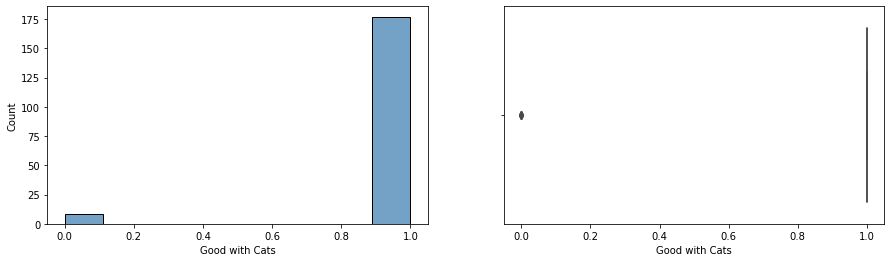

Good with Dogs
Skew: -1.9


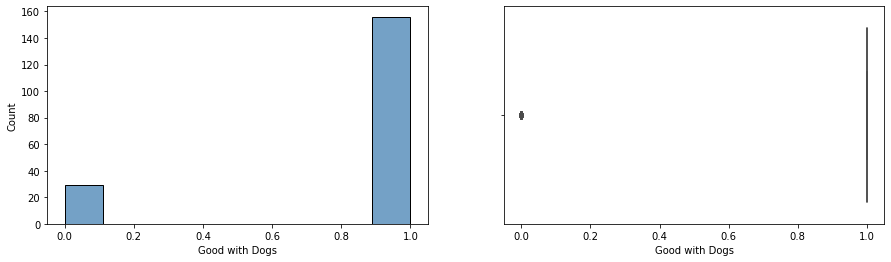

Good with Children
Skew: -3.09


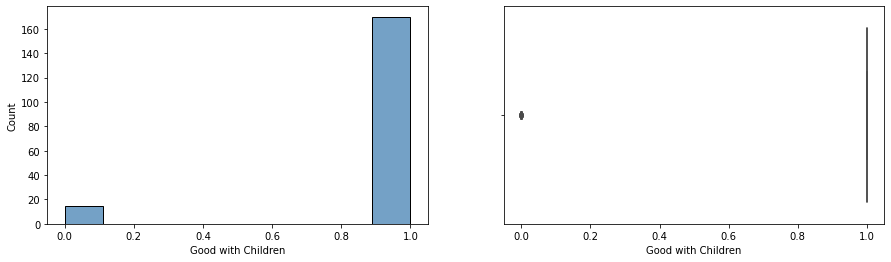

Good with Families
Skew: 0


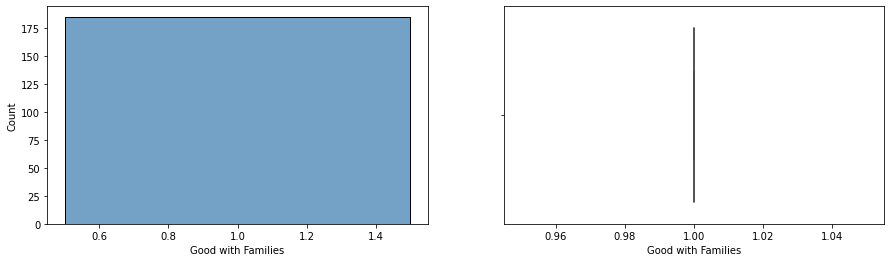

Lifespan Min Years
Skew: 1.49


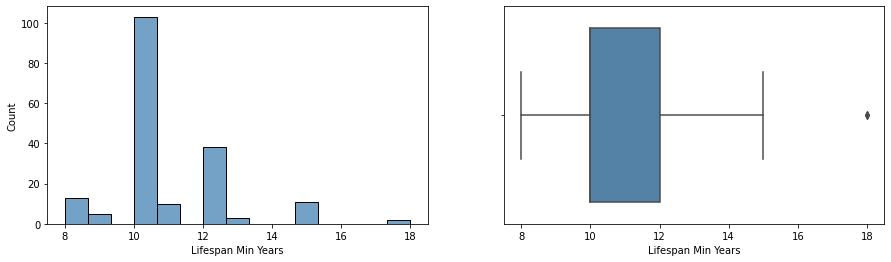

Lifespan Up to + Years
Skew: 0.42


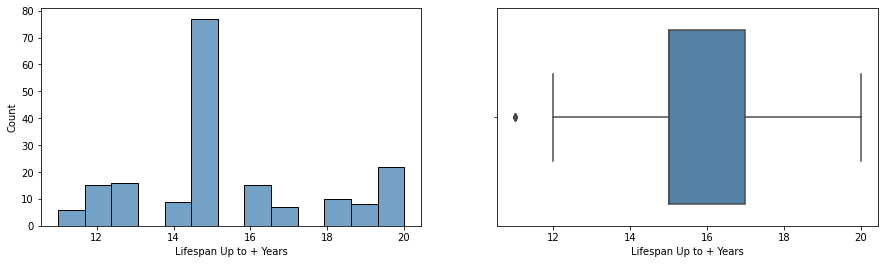

In [43]:
# Histogram and box plot to show the pattern of the variables, skewness, and outliers
for col in num_cols:
    print(col)
    print('Skew:', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data=data, x=data[col], color = 'steelblue')
    plt.subplot(1, 2, 2)
    sns.boxplot(data=data, x=data[col], color = 'steelblue')
    plt.show()

#### Observations
- Most of the cat breeds are livable with cats, dogs, and children
- All cats are livable with families
- Minimum lifespan of most cat breeds lays in range of 10-12 years
- Maximum lifespan of most cat breeds lays in range of 15-17 years

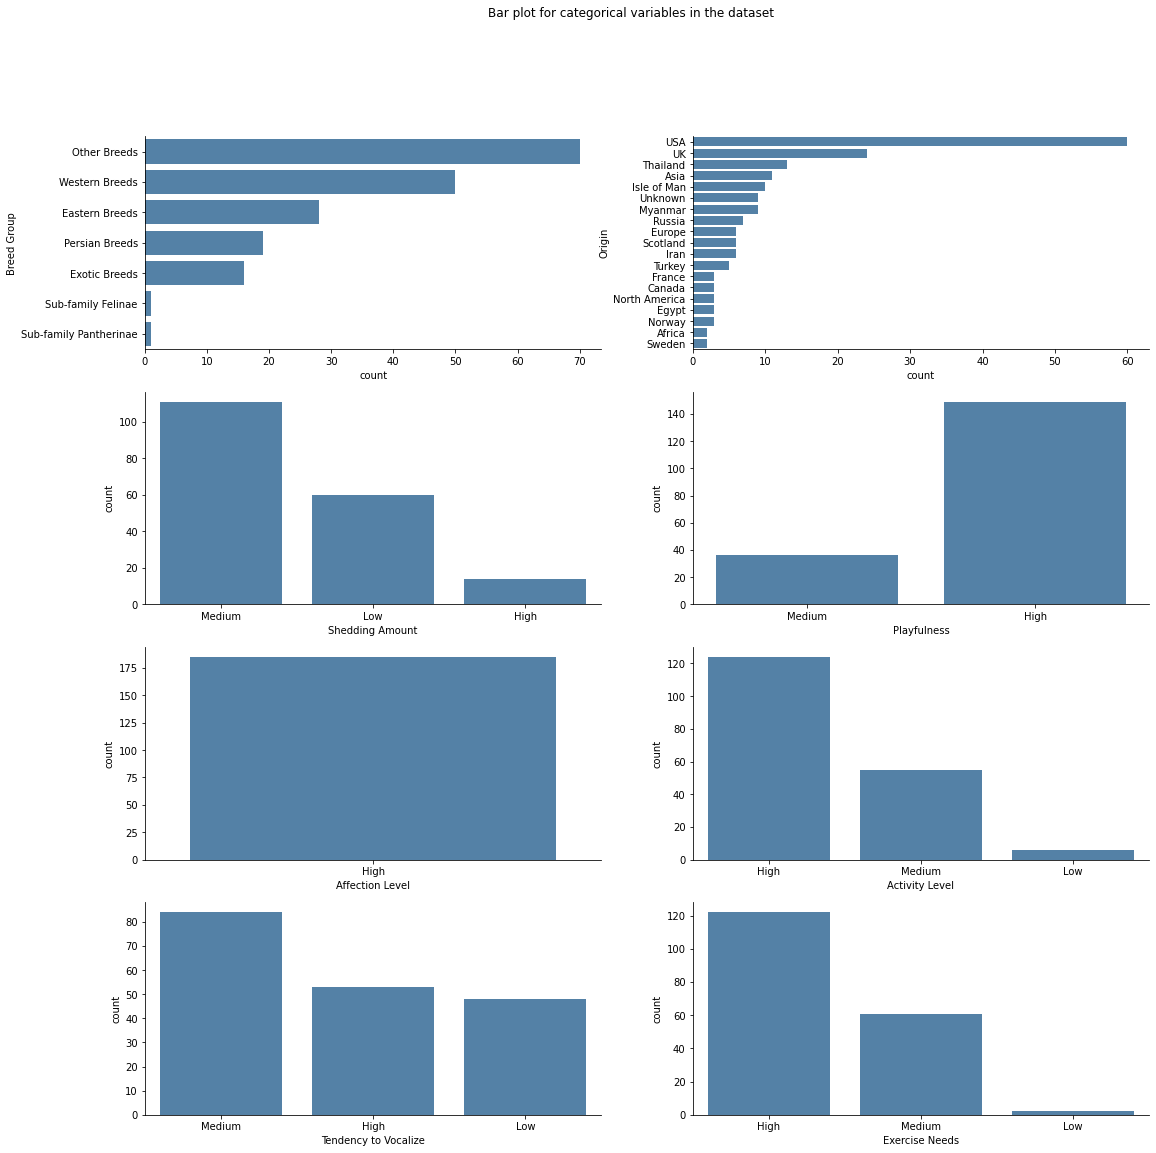

In [44]:
# Histogram plot to show the pattern of the variables
fig, axes = plt.subplots(4, 2, figsize = (18, 18))
fig.suptitle('Bar plot for categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], y = 'Breed Group', data = data, color = 'steelblue', order = data['Breed Group'].value_counts().index)
sns.countplot(ax = axes[0, 1], y = 'Origin', data = data, color = 'steelblue', order = data['Origin'].value_counts().index)
sns.countplot(ax = axes[1, 0], x = 'Shedding Amount', data = data, color = 'steelblue', order = data['Shedding Amount'].value_counts().index)
sns.countplot(ax = axes[1, 1], x = 'Playfulness', data = data, color = 'steelblue', order = data['Playfulness'].head(20).value_counts().index)
sns.countplot(ax = axes[2, 0], x = 'Affection Level', data = data, color = 'steelblue', order = data['Affection Level'].value_counts().index)
sns.countplot(ax = axes[2, 1], x = 'Activity Level', data = data, color = 'steelblue', order = data['Activity Level'].value_counts().index)
sns.countplot(ax = axes[3, 0], x = 'Tendency to Vocalize', data = data, color = 'steelblue', order = data['Tendency to Vocalize'].value_counts().index)
sns.countplot(ax = axes[3, 1], x = 'Exercise Needs', data = data, color = 'steelblue', order = data['Exercise Needs'].value_counts().index)
sns.despine()

#### Observations
- Western and Other breed groups are the largest
- Most cats breeds are originated from USA
- Most of the cat breeds have high playfulness, activity level, and need of exercise
- All cat breeds are highly affectionate
- Very few cat breeds have high shedding

#### Bivariate Analysis

Breed Group


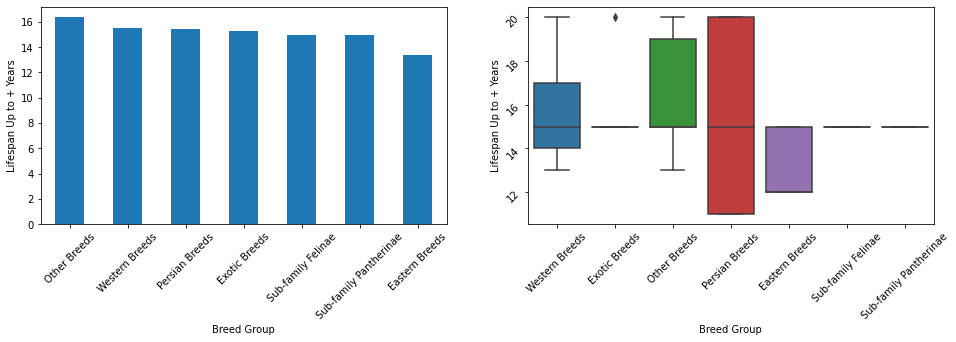

Origin


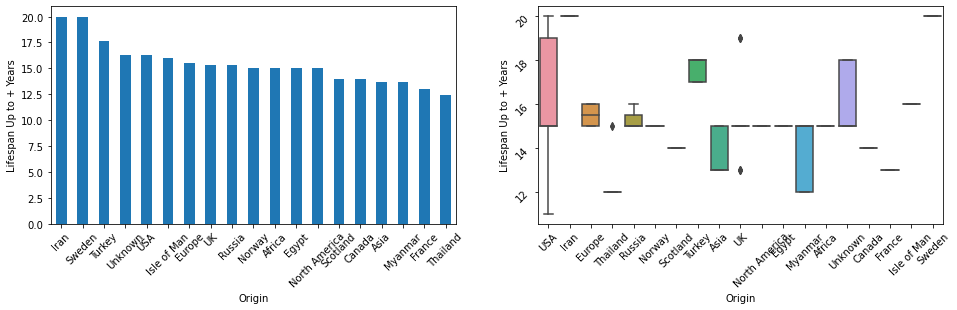

Coat Length


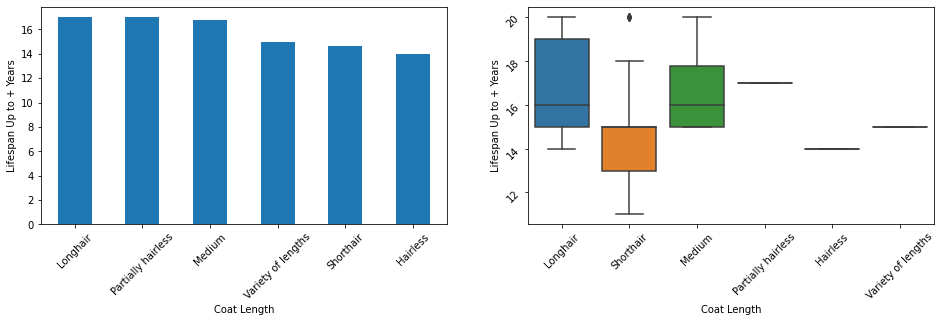

Shedding Amount


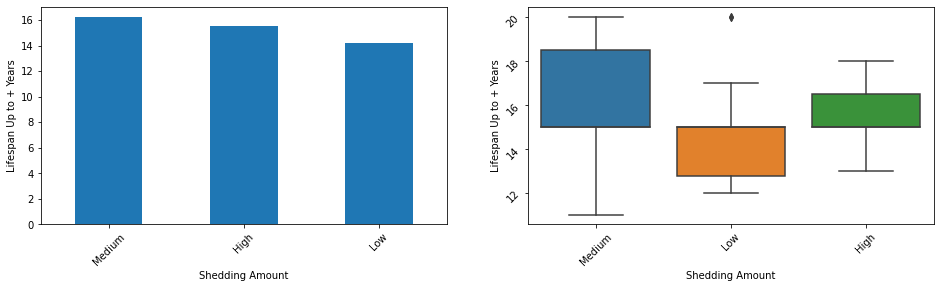

Playfulness


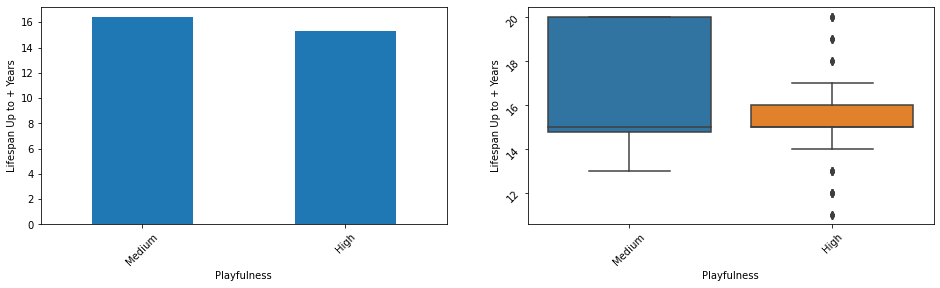

Activity Level


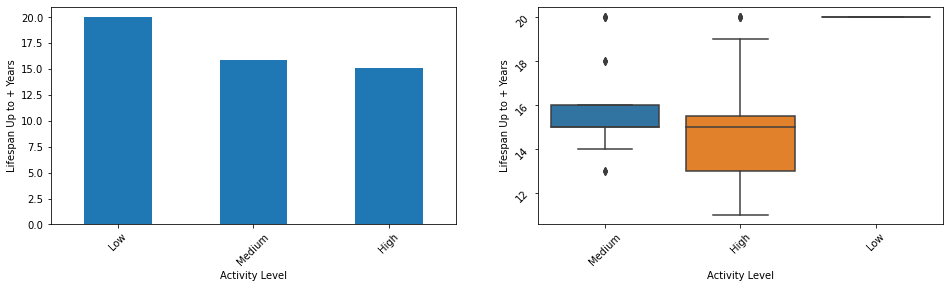

Tendency to Vocalize


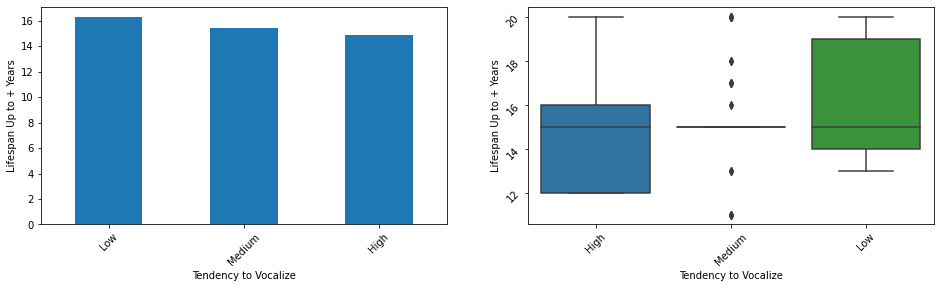

Exercise Needs


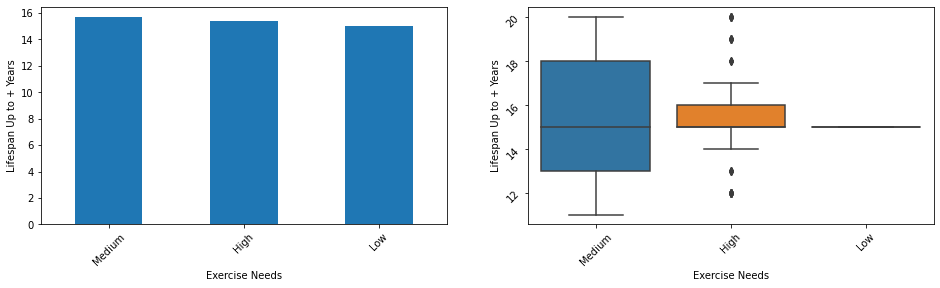

In [45]:
# Bar and box plot to show the relationship between categorical variables and numerical variables
group = data[['Breed Group', 'Origin', 'Coat Length', 'Shedding Amount', 'Playfulness', 'Activity Level', 'Tendency to Vocalize', 'Exercise Needs']]

for col in group:
    print(col)
    plt.figure(figsize = (16, 4))
    plt.subplot(1, 2, 1)
    data.groupby(data[col])['Lifespan Up to + Years'].mean().sort_values(ascending=False).plot(kind='bar', rot=45, ylabel='Lifespan Up to + Years')
    # sns.barplot((data.groupby(data[col])['Lifespan Up to + Years'].mean().sort_values(ascending=False)), data=data, x=data[col], y='Lifespan Up to + Years')
    plt.subplot(1, 2, 2)
    sns.boxplot(data=data, x=data[col], y='Lifespan Up to + Years').tick_params(labelrotation=45)
    plt.show()

#### Observations
- Cat breeds originated in Iran and Sweden have a higher lifespan
- Longhaired cats have a higher lifespan
- Cat breeds with lower playfulness level, activity level, tendensy to vocalize, and need of exercise have a higher lifespan

#### Multivariate Analysis

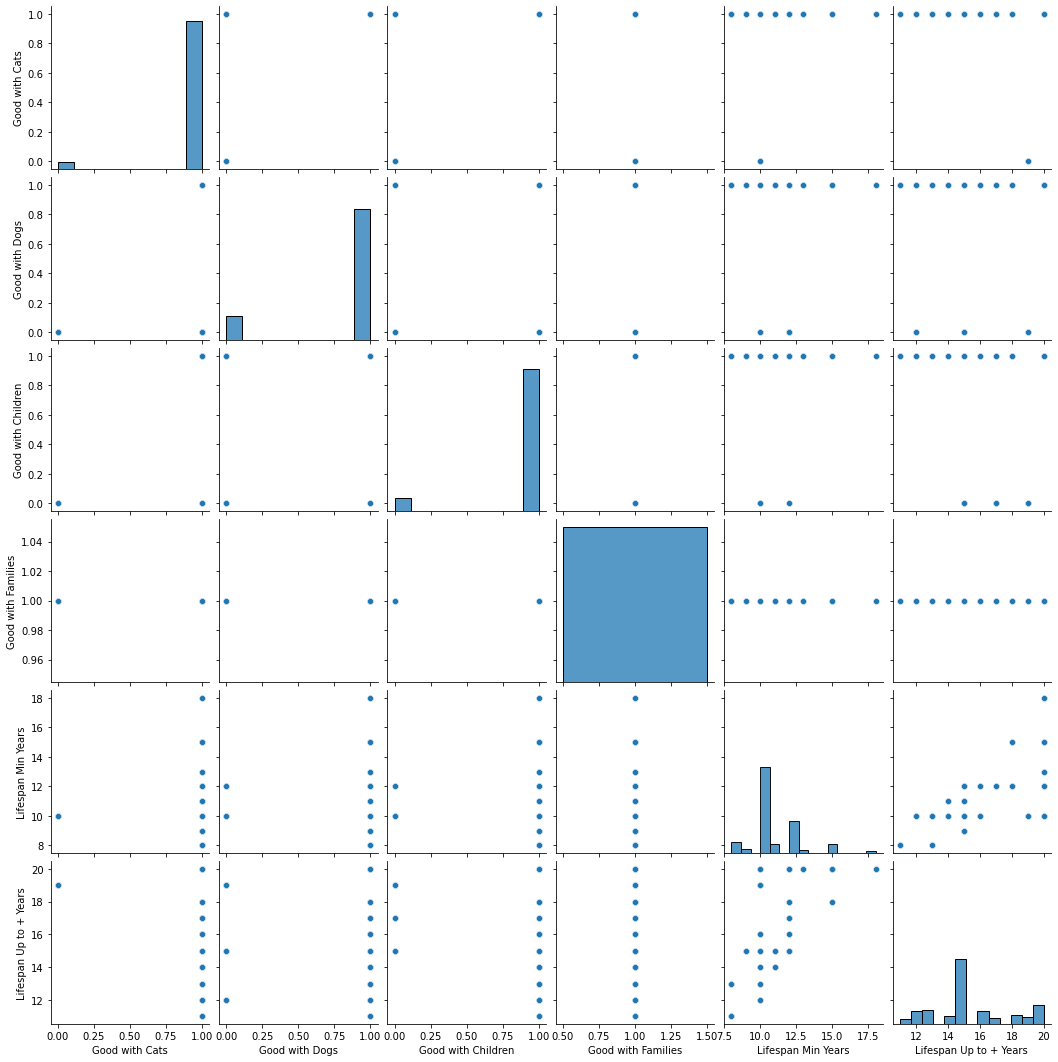

In [46]:
sns.pairplot(data)

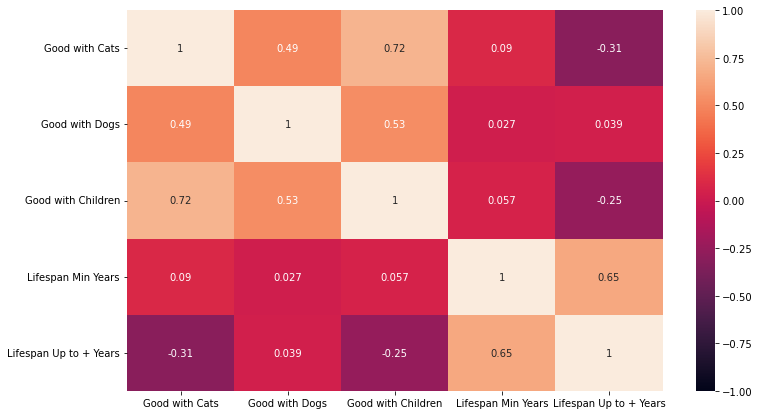

In [47]:
# Heat Map to see the correlation between the variables
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Good with Families'], axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

#### Observations
- Cat that are good with other cats have a strong positive correleation with cats that are good with children
- Cat that are good with other cats have a moderate positive correleation with cats that are good with dogs
- Cat that are good with dogs have a moderate positive correleation with cats that are good with children

&nbsp;
# Need help choosing a cat breed?

## Run the next cell &darr;

In [ ]:
coat_length = str (input("Type cat's coat length \nChoose from (Longhair, Shorthair, Medium, Partially hairless, Hairless): "))
shedding_amount = str (input("Type cat's shedding amount \nChoose from (Low, Medium, High): "))
playfulness = str (input("Type cat's playfulness \nChoose from (Medium, High): "))
activity_level = str (input("Type cat's activity level \nChoose from (Low, Medium, High): "))
vocal = str (input("Type cat's tendency to vocalize \nChoose from (Low, Medium, High): "))
exercise_needs = str (input("Type cat's need of exercise \nChoose from (Low, Medium, High): "))
good_with_cats = int (input("Type cat's livability with other cats \nChoose from (1 if Yes, 0 if No): "))
good_with_dogs = int (input("Type cat's livability with dogs \nChoose from (1 if Yes, 0 if No): "))
good_with_children = int (input("Type cat's livability with children \nChoose from (1 if Yes, 0 if No): "))
good_with_families = int (input("Type cat's livability with families \nChoose from (1 if Yes, 0 if No): "))

display(df.loc[(df['Coat Length'] == coat_length) & (df['Shedding Amount'] == shedding_amount) & (df['Playfulness'] == playfulness) & (df['Activity Level'] == activity_level) & 
               (df['Tendency to Vocalize'] == vocal) & (df['Exercise Needs'] == exercise_needs) & (df['Good with Cats'] == good_with_cats) & (df['Good with Dogs'] == good_with_dogs) &
               (df['Good with Children'] == good_with_children) & (df['Good with Families'] == good_with_families)])


print('NOTE: If there is no cat breed shown, don\'t worry (this database is small), your perfect cat is out there waiting for you! 😊 🐱🐾')

&nbsp;
#### Data Source: https://basepaws.com/cat-breeds
#### Project Author: Marina Kompaniyets